In [37]:
import numpy as np
import pandas as pd
import os
from datetime import date
import seaborn as sns  
import matplotlib.pyplot as plt

# Settings: 
- seting up working directory 
- reading the data

In [12]:
cwd = os.getcwd()
print(f'Current working directory: {cwd}')
__root = "c:\\Kamil\\rekrutacje\\eon\\cases\\"
__programs= str(__root + "EON\\00_programs\\")
__input = str(__root + "EON\\01_input\\")
__output = str(__root + "EON\\02_output\\")
__temp = str(__root + "EON\\03_temp\\")


Current working directory: c:\Kamil\rekrutacje\eon\cases\EON\00_programs


In [16]:
df = pd.read_csv(str(__input + "Results_RAW.csv"), delimiter=";")

# Basic information about the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   QuestID             3546 non-null   int64 
 1   InterviewDate       3546 non-null   object
 2   InterviewLengthSec  3546 non-null   int64 
 3   InterviewStatus     3546 non-null   int64 
 4   AgeBands            3546 non-null   int64 
 5   Region              3546 non-null   int64 
 6   BA02R_271_PL        3546 non-null   int64 
 7   BA02R_272_PL        3546 non-null   int64 
 8   BA02R_273_PL        3546 non-null   int64 
 9   BA02R_274_PL        3546 non-null   int64 
 10  BA02R_279_PL        3546 non-null   int64 
 11  BA02R_280_PL        3546 non-null   int64 
 12  BA02R_282_PL        3546 non-null   int64 
 13  BA02R_283_PL        3546 non-null   int64 
 14  BA02R_284_PL        3546 non-null   int64 
 15  BA02R_285_PL        3546 non-null   int64 
 16  SU01R               3546

In [19]:
df.shape

(3546, 18)

In [25]:
df.head()

,QuestID,InterviewDate,InterviewLengthSec,InterviewStatus,AgeBands,Region,BA02R_271_PL,BA02R_272_PL,BA02R_273_PL,BA02R_274_PL,BA02R_279_PL,BA02R_280_PL,BA02R_282_PL,BA02R_283_PL,BA02R_284_PL,BA02R_285_PL,SU01R,NPS01R
0,1,12.04.2020,107,1,3,911,0,1,1,1,0,1,1,1,0,0,552,0
1,2,07.04.2020,379,1,5,903,1,1,1,1,0,0,1,1,0,0,543,5
2,3,12.04.2020,384,1,3,901,0,1,0,0,0,0,0,0,0,0,542,2
3,4,03.04.2020,227,1,5,914,0,0,0,0,0,0,1,0,0,0,552,6
4,5,21.04.2020,176,1,2,907,1,1,1,1,0,1,1,1,0,0,541,0


- formatting dates

In [26]:
df['InterviewDate'] = pd.to_datetime(df['InterviewDate'], format = '%d.%m.%Y')

In [27]:
df['InterviewDate']

0      2020-04-12
1      2020-04-07
2      2020-04-12
3      2020-04-03
4      2020-04-21
          ...    
3541   2020-06-12
3542   2020-06-02
3543   2020-06-04
3544   2020-06-03
3545   2020-06-17
Name: InterviewDate, Length: 3546, dtype: datetime64[ns]

# Data Exploration
- visualization

In [29]:
df.groupby('AgeBands').mean()['NPS01R']

AgeBands
1    4.780645
2    4.554569
3    4.580556
4    4.570866
5    4.371311
Name: NPS01R, dtype: float64

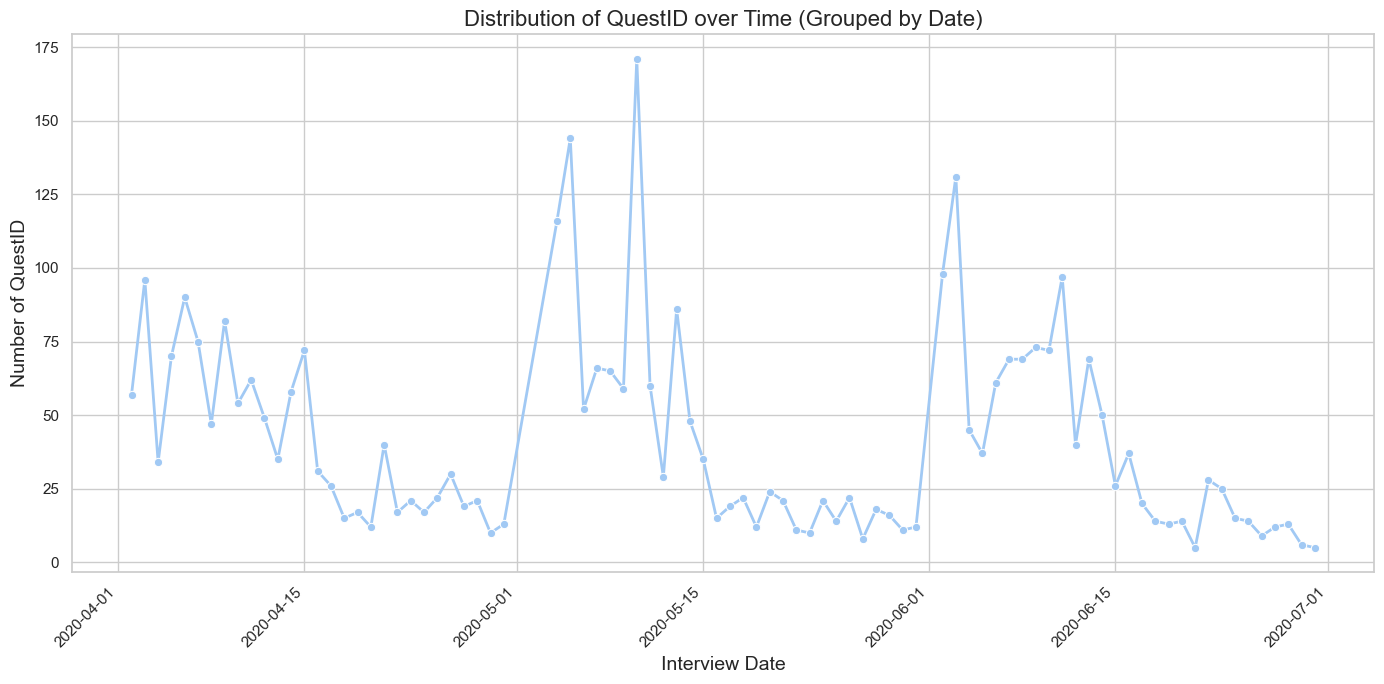

In [46]:

questid_counts = df.groupby('InterviewDate')['QuestID'].count()

# Plot the distribution over time

# Set seaborn style
sns.set(style="whitegrid", palette="pastel")

# Plot the distribution over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=questid_counts, color='b', marker='o', linestyle='-', linewidth=2)

# Beautify the plot
plt.title('Distribution of QuestID over Time (Grouped by Date)', fontsize=16)
plt.xlabel('Interview Date', fontsize=14)
plt.ylabel('Number of QuestID', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()